In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Vignesh T\\Downloads\\HR_Employee_Attrition.csv")

In [3]:
print("Data Overview:")
print(df.shape)
print(df.info())

Data Overview:
(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

In [4]:
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

In [5]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top   

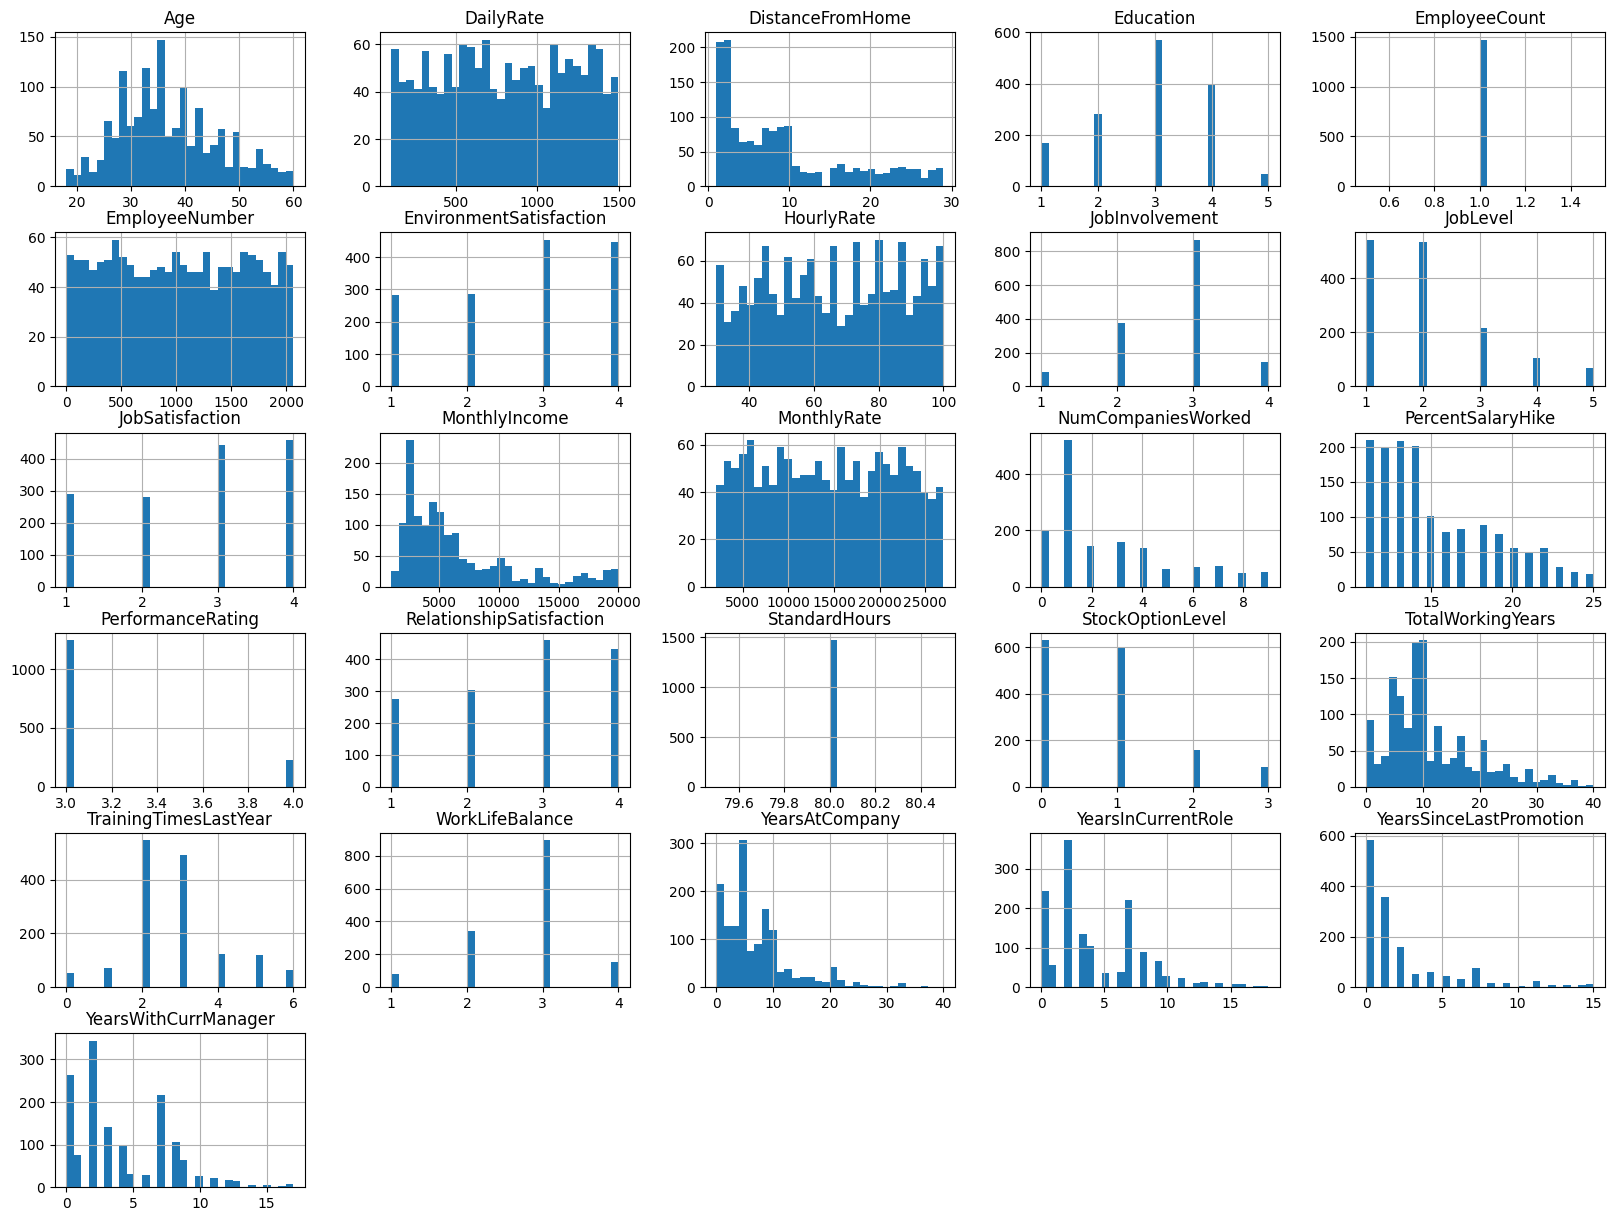

In [6]:
#Exploratory Data Analysis
# Data Distribution
df.hist(bins=30, figsize=(20, 15))
plt.show()

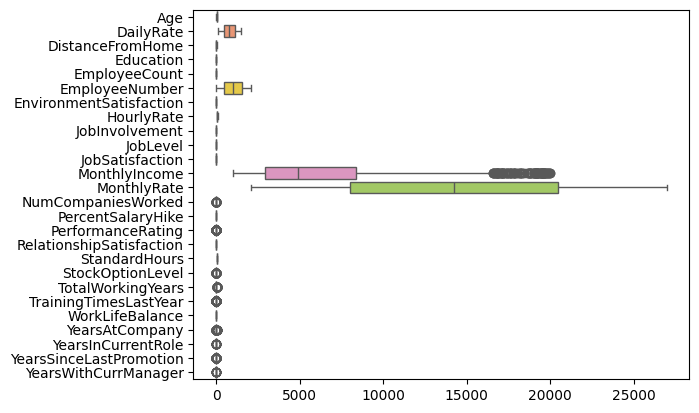

In [7]:
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

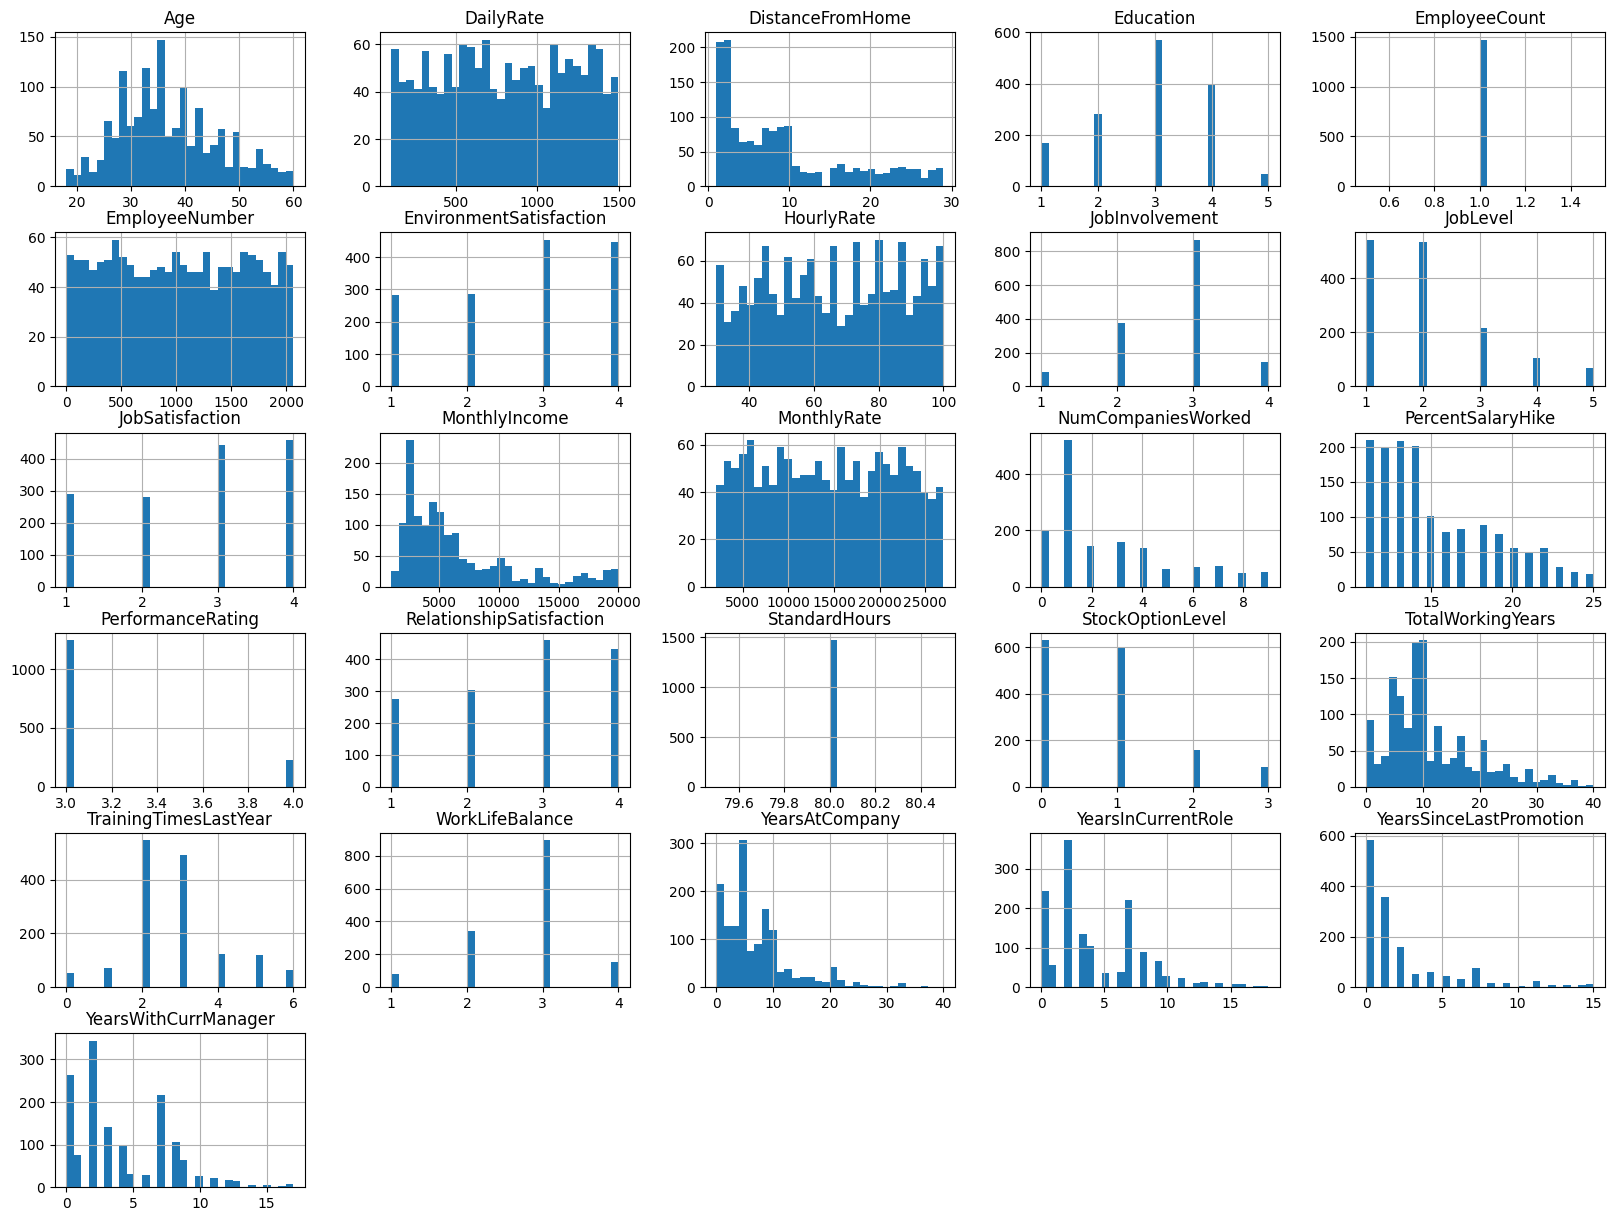

In [8]:
# Univariate Analysis
# Numerical Variables
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(20, 15))
plt.show()

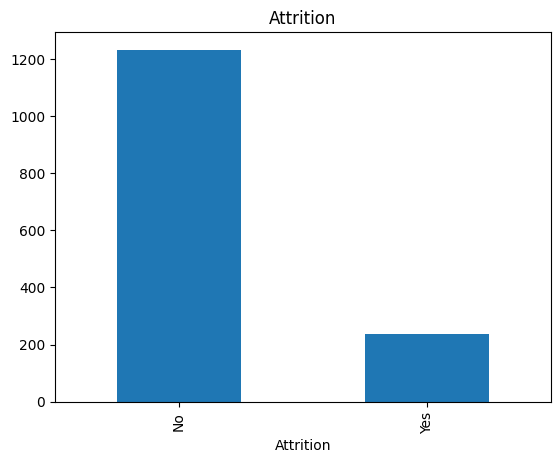

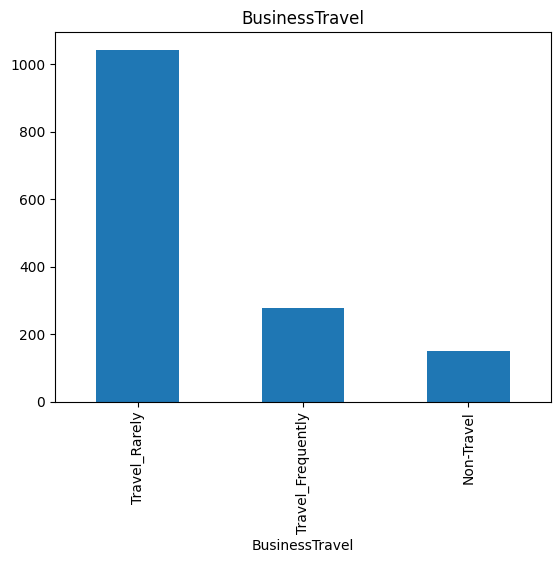

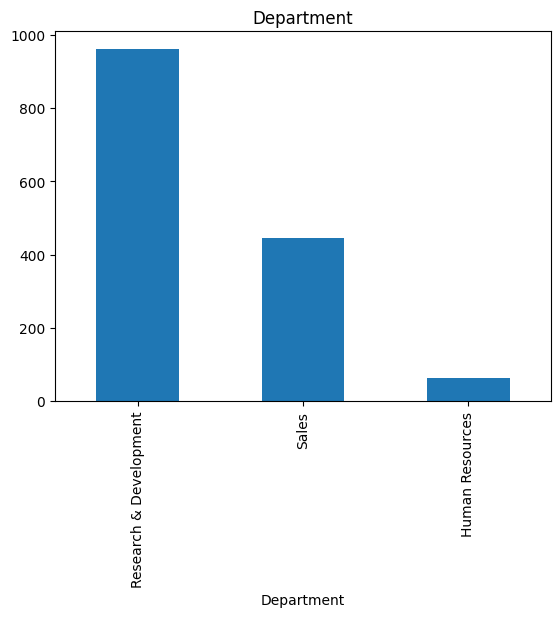

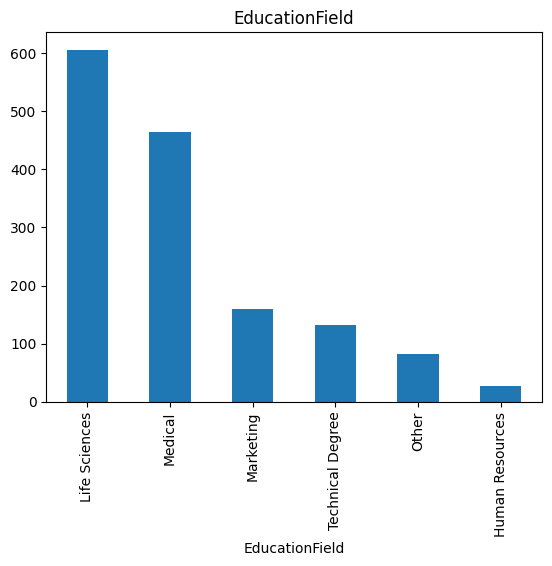

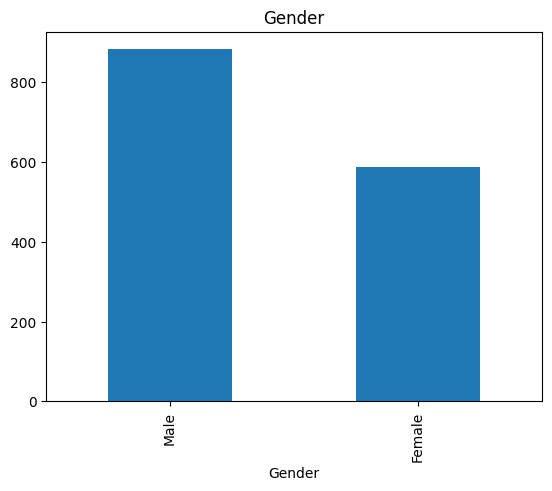

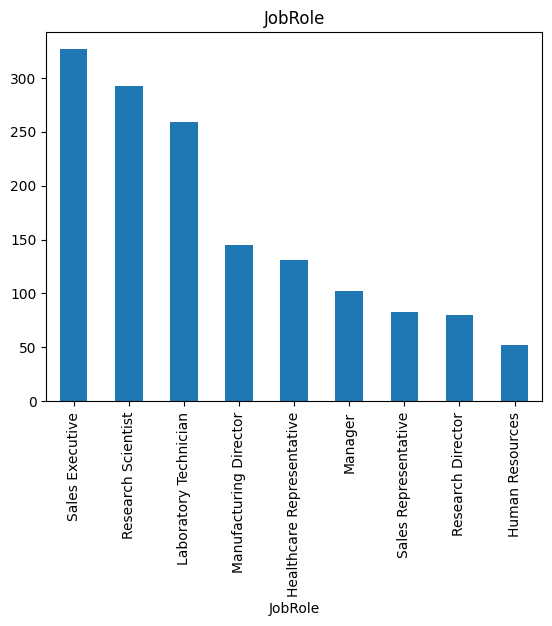

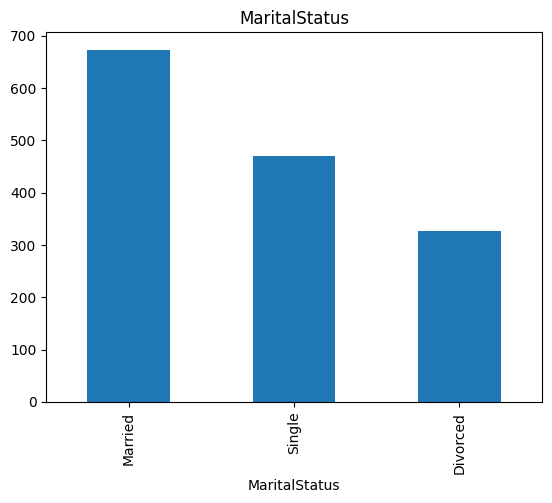

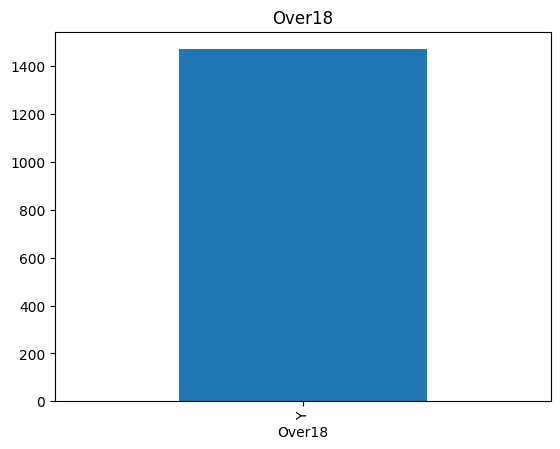

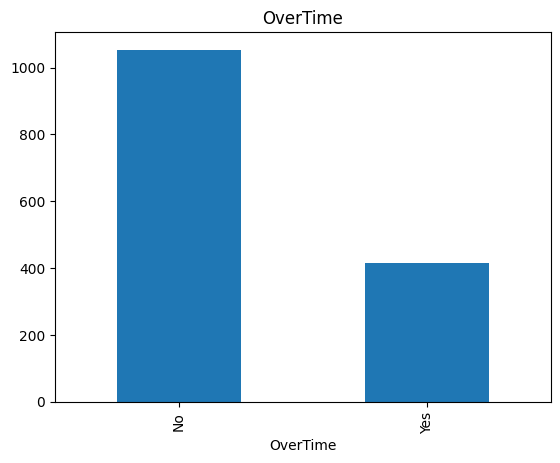

In [9]:
# Categorical Variables
for col in df.select_dtypes(include=['object']).columns:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

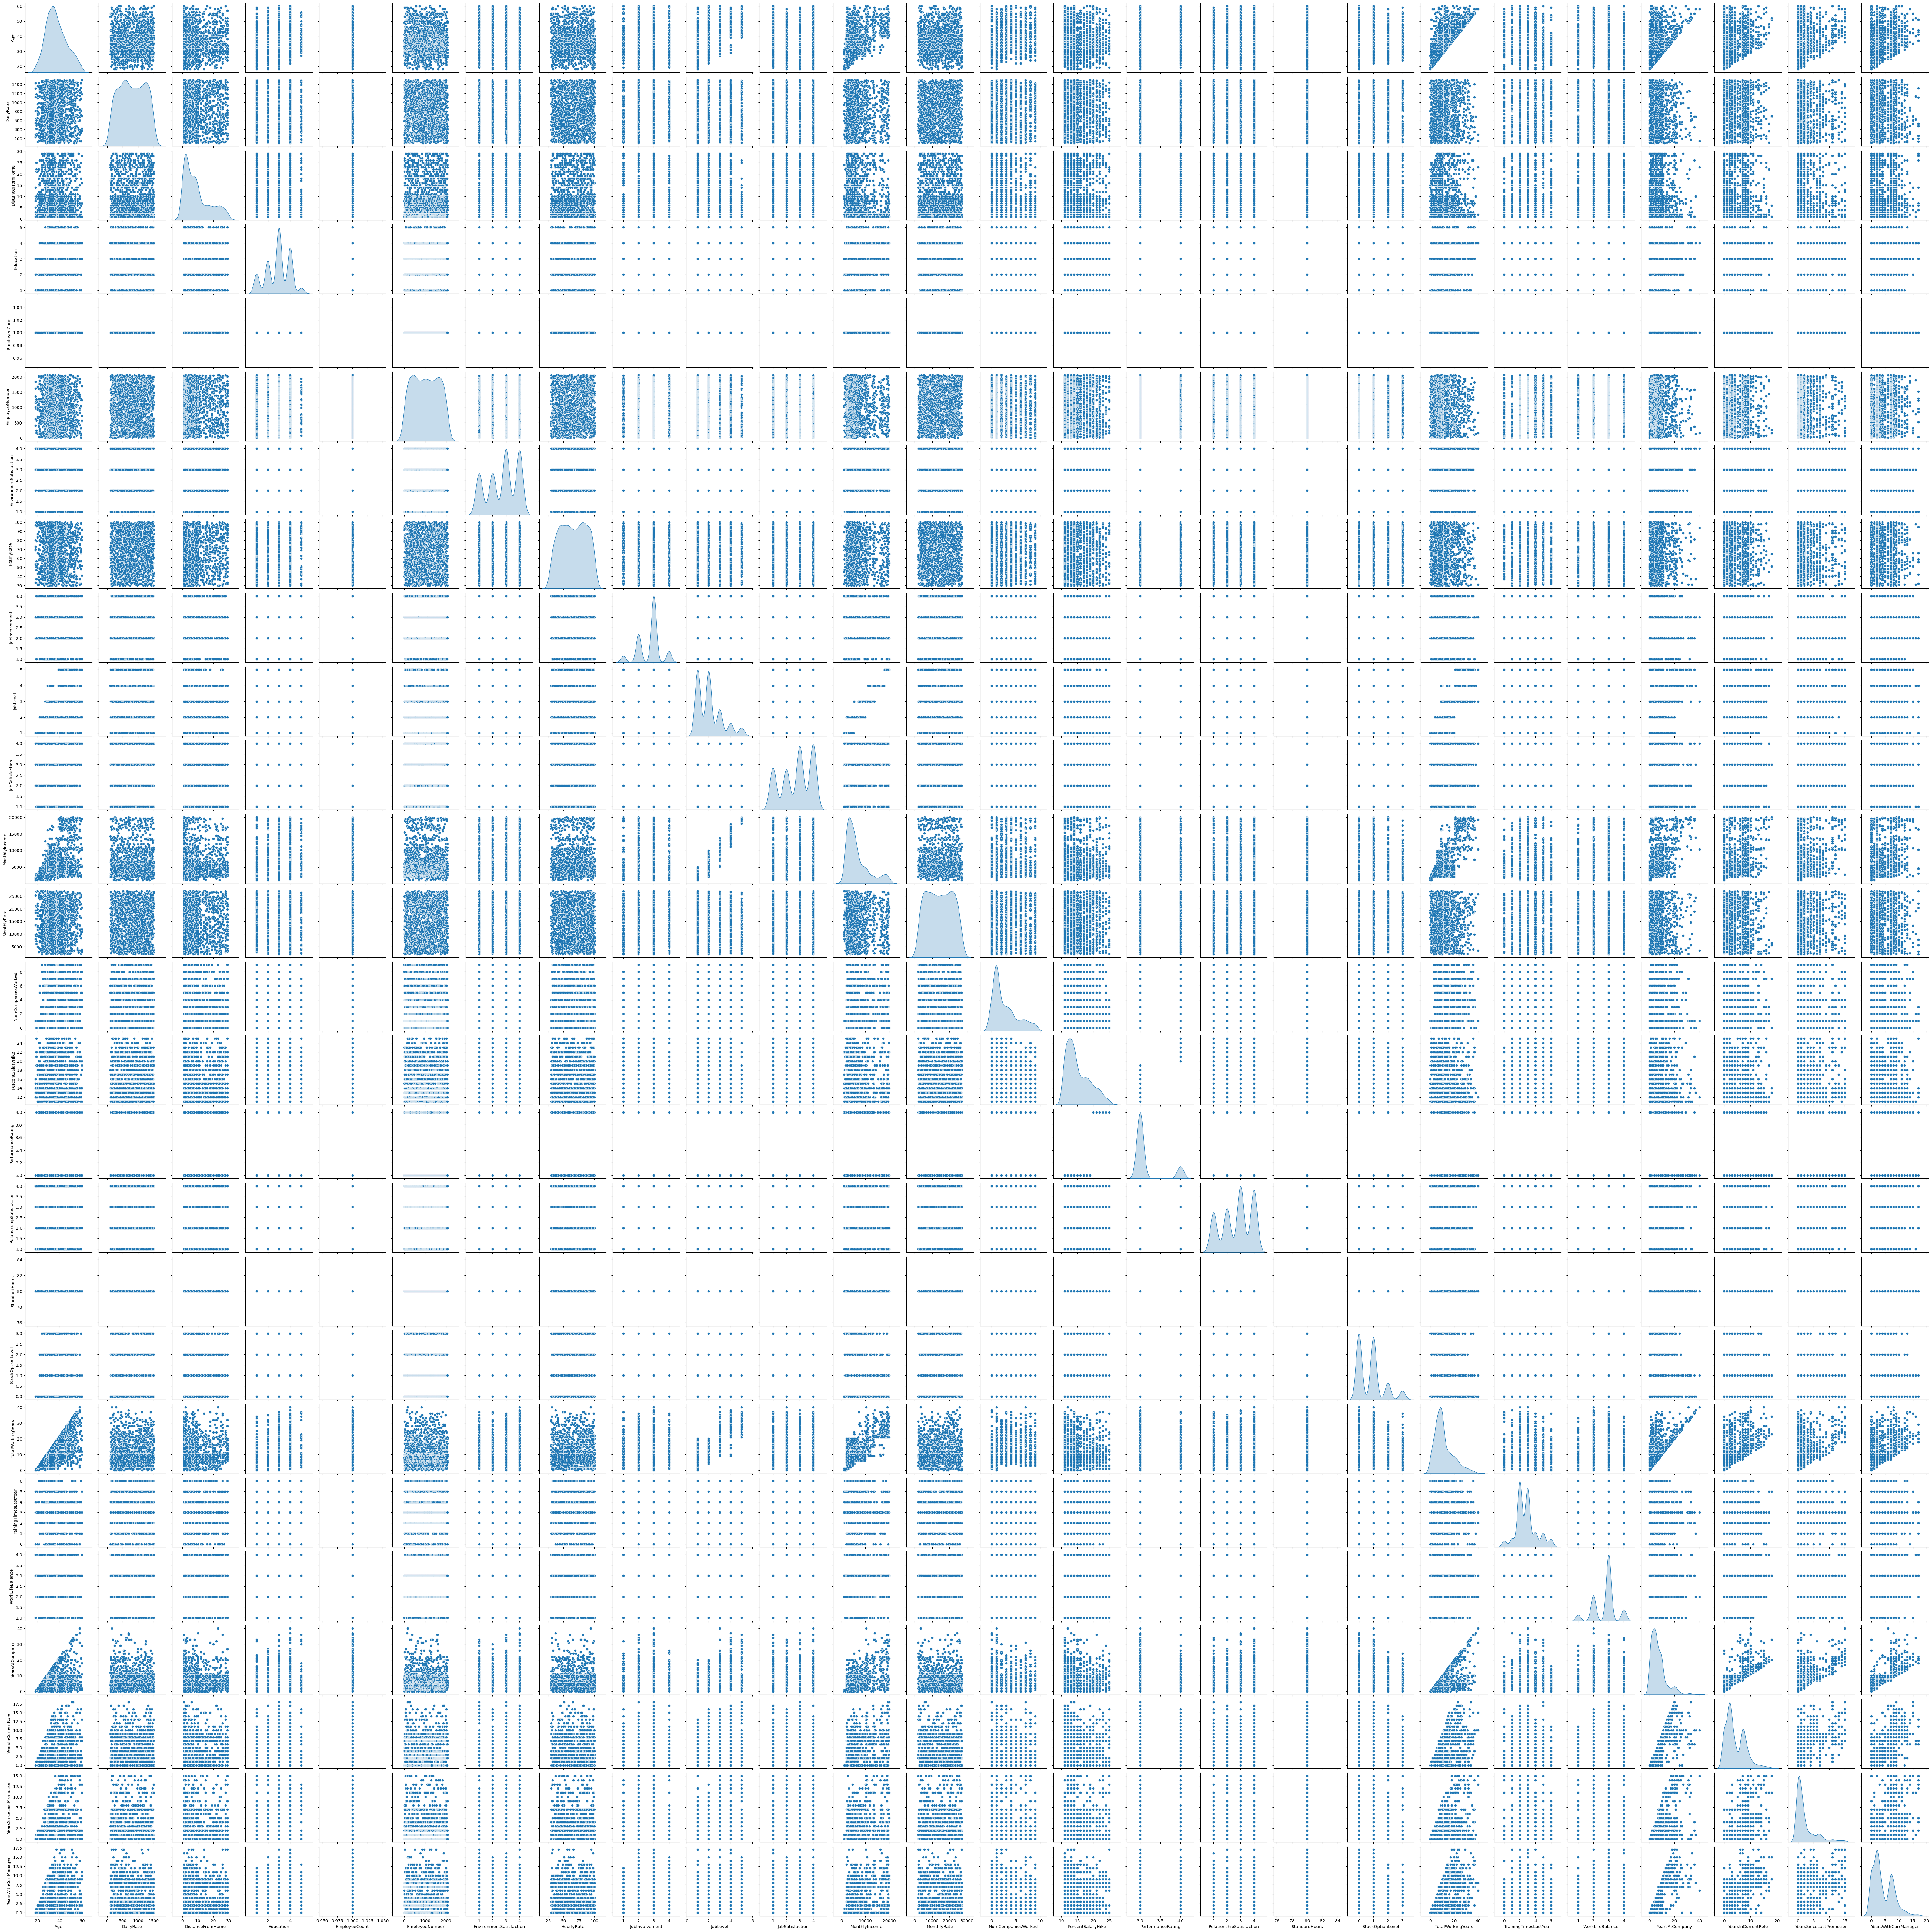

In [10]:
# Bivariate Analysis
# Relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

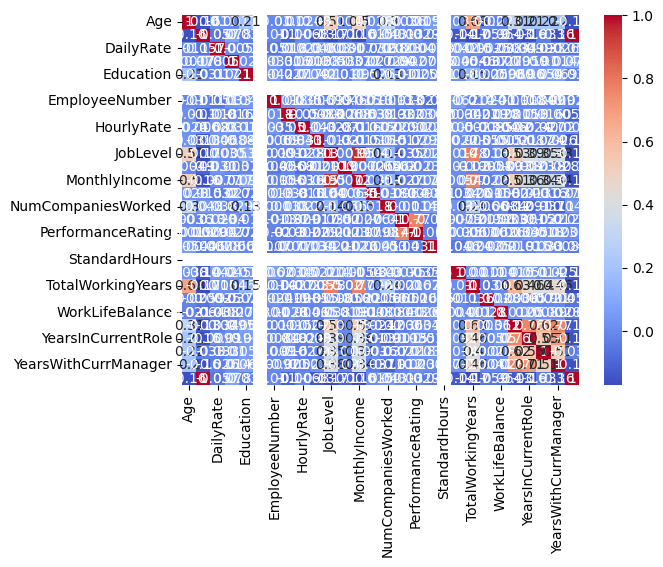

In [13]:

non_numeric_columns = df.select_dtypes(include=['object']).columns

# Step 2: Convert or drop non-numeric columns
# Convert 'Attrition' column if it's a categorical variable
if 'Attrition' in non_numeric_columns:
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    non_numeric_columns = non_numeric_columns.drop('Attrition')

# For other non-numeric columns, you can choose to drop or convert them based on your needs.
# Here we will drop them for simplicity.
df_numeric = df.drop(columns=non_numeric_columns)

# Step 3: Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Step 4: Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [14]:
# Missing Value Treatment
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [16]:
#  Feature Engineering
# New Features: Example - creating a new feature 'Tenure'
df['Tenure'] = df['YearsAtCompany'] - df['YearsInCurrentRole']

In [17]:
# Feature Transformation: Example - log transformation
df['MonthlyIncome_log'] = np.log(df['MonthlyIncome'] + 1)

In [18]:
# Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [19]:
#  One Hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [20]:
# Preprocessing Data
# Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_numeric', 'Tenure',
       'MonthlyIncome_log'],
      dtype='object')


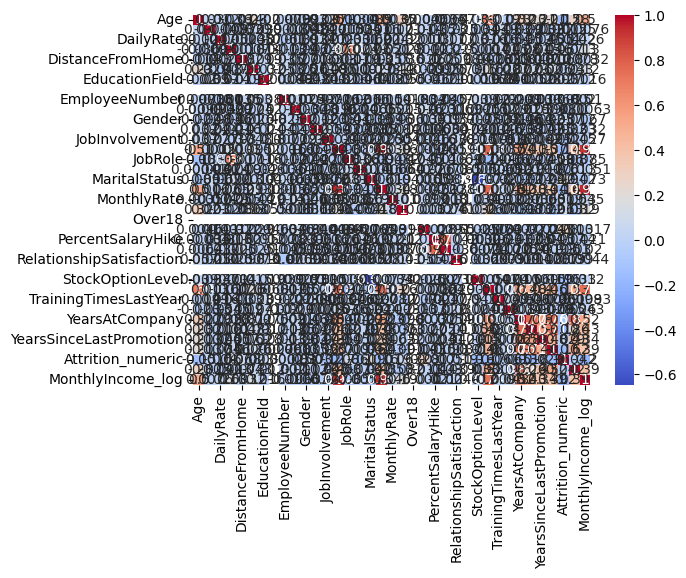

In [22]:
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Step 2: Verify the column names
print(df.columns)

# Step 3: Split the data
# Assuming the target column is now 'Attrition' after mapping
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plotting the correlation heatmap for the training set
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample DataFrame
# Replace 'your_data.csv' with your actual data file
# df = pd.read_csv('your_data.csv')  # Load your data

# For demonstration, let's create a sample DataFrame with possible issues
data = {
    'Age': [34, 28, 45, 33],
    'Department': ['Sales', 'Engineering', 'HR', 'Sales'],
    'Attrition': ['Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Step 1: Verify DataFrame structure
print("Initial DataFrame:")
print(df.head())
print(df.info())

# Step 2: Ensure 'Attrition' column is correctly mapped and exists
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    print("Attrition column after mapping:")
    print(df['Attrition'].value_counts())
else:
    raise KeyError("The 'Attrition' column does not exist in the DataFrame.")

# Step 3: Check for non-numeric columns and handle them
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert or drop non-numeric columns (excluding the target variable)
# One approach is to use one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)
print("DataFrame after handling non-numeric columns:")
print(df.head())

# Verify dataset after handling non-numeric columns
print(f'Number of samples after handling non-numeric columns: {df.shape[0]}')

# If the dataset is still empty after handling non-numeric columns, address it
if df.shape[0] == 0:
    raise ValueError("The dataset is empty after handling non-numeric columns. Please check your data.")

# Step 4: Split the data
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions
clf_predictions = clf.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, clf_predictions))
print("Classification Report:")
print(classification_report(y_test, clf_predictions))


Initial DataFrame:
   Age   Department Attrition
0   34        Sales       Yes
1   28  Engineering        No
2   45           HR       Yes
3   33        Sales        No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         4 non-null      int64 
 1   Department  4 non-null      object
 2   Attrition   4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes
None
Attrition column after mapping:
Attrition
1    2
0    2
Name: count, dtype: int64
Non-numeric columns: Index(['Department'], dtype='object')
DataFrame after handling non-numeric columns:
   Age  Attrition  Department_HR  Department_Sales
0   34          1          False              True
1   28          0          False             False
2   45          1           True             False
3   33          0          False              True
Number of samples after handl

In [28]:
clf_conf_matrix = confusion_matrix(y_test, clf_predictions)
clf_accuracy = accuracy_score(y_test, clf_predictions)

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [29]:
print("\nConfusion Matrix (Classification):")
print(clf_conf_matrix)
print(f"Accuracy (Classification): {clf_accuracy}")


Confusion Matrix (Classification):
[[1]]
Accuracy (Classification): 1.0


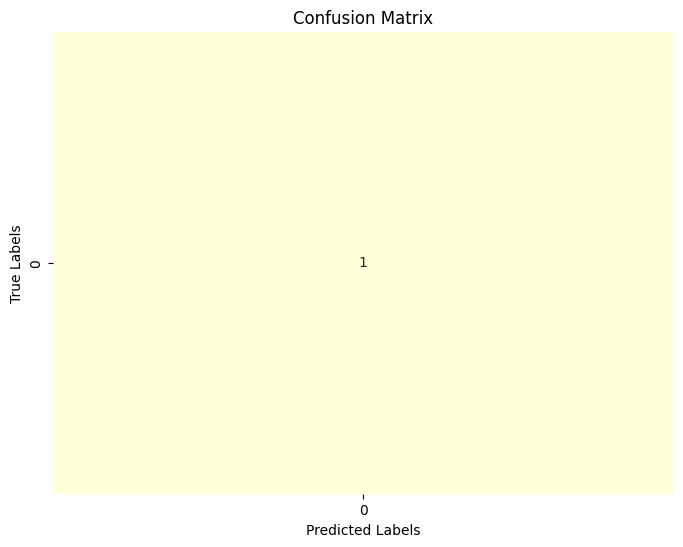

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(clf_conf_matrix, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Regression
if 'Age' not in df.columns:
    raise KeyError("'Age' column not found in the dataset")

# Proceed with your regression code
y_reg = df['Age']
X_reg = df.drop('Age', axis=1)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_reg_train, y_reg_train)
reg_predictions = reg_model.predict(X_reg_test)
reg_mse = mean_squared_error(y_reg_test, reg_predictions)
print(f"Mean Squared Error (Regression): {reg_mse}")

Mean Squared Error (Regression): 110.25


In [32]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

In [39]:
#grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=X_train.shape[0], n_jobs=-1)

grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
best_predictions = best_clf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Best Grid Search Accuracy (Classification): {best_accuracy}")

ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [41]:
print(f"Number of samples in X_train: {X_train.shape[0]}")


Number of samples in X_train: 3


In [42]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)


In [43]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()


In [44]:
from sklearn.model_selection import LeaveOneOut

# Assuming 'clf', 'param_grid', 'X_train', and 'y_train' are defined as before
loo = LeaveOneOut()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=loo, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
best_predictions = best_clf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Best Grid Search Accuracy (Classification): {best_accuracy}")


Best Grid Search Accuracy (Classification): 1.0


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

Accuracy: 87.41%
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       255
        True       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



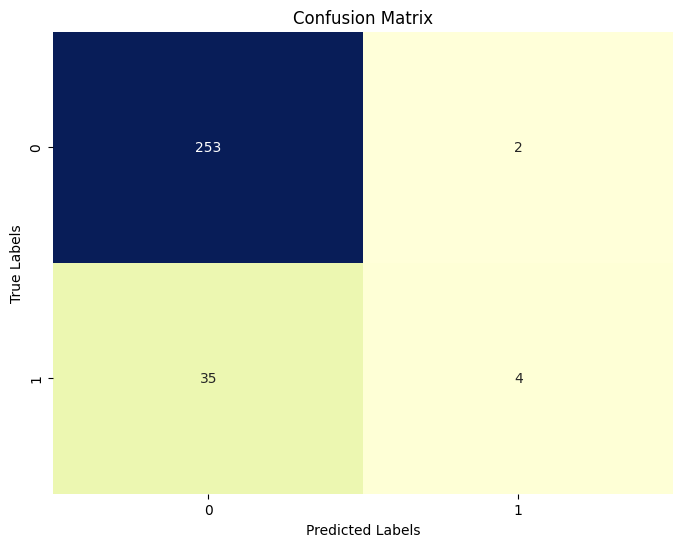

Mean Squared Error (MSE): 1364122.22


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\Vignesh T\\Downloads\\HR_Employee_Attrition.csv")

# Verify if 'Attrition' column exists
if 'Attrition' not in df.columns:
    raise KeyError("'Attrition' column not found in the dataset")

# Drop unnecessary columns
df = df.drop(['BusinessTravel'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df)

# Separate features and target variable for classification (Attrition)
X = df.drop(['Attrition_Yes', 'Attrition_No'], axis=1)
y = df['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Classification model with GridSearchCV
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
best_predictions = best_clf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)

# Print accuracy
print(f"Accuracy: {best_accuracy:.2%}")

# Print classification report
clf_report = classification_report(y_test, best_predictions)
print("Classification Report:")
print(clf_report)

# Plot confusion matrix
clf_conf_matrix = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(clf_conf_matrix, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# For regression, if predicting a continuous variable like MonthlyIncome
if 'MonthlyIncome' not in df.columns:
    raise KeyError("'MonthlyIncome' column not found in the dataset")

y_reg = df['MonthlyIncome']
X_reg = df.drop('MonthlyIncome', axis=1)

# Split data into training and testing sets for regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Regression model
reg_model = LinearRegression()
reg_model.fit(X_reg_train, y_reg_train)

# Predict on the test set for regression
reg_predictions = reg_model.predict(X_reg_test)

# Calculate regression metrics
reg_mse = mean_squared_error(y_reg_test, reg_predictions)
print(f"Mean Squared Error (MSE): {reg_mse:.2f}")
